# Light-GBM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from collections import Counter

In [3]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")

Number of subjects in train:  21
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


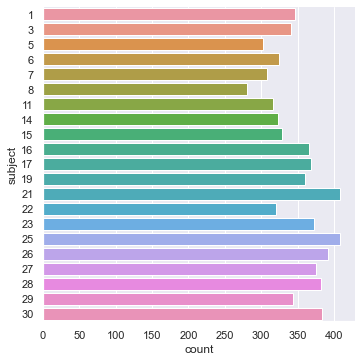

In [4]:
print("Number of subjects in train: ", len(df_train["subject"].unique()))
print(df_train["subject"].value_counts())
sb.catplot(y = "subject", data = df_train, kind = "count")
df_train.info()

Number of subjects in test:  9
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: subject, dtype: int64


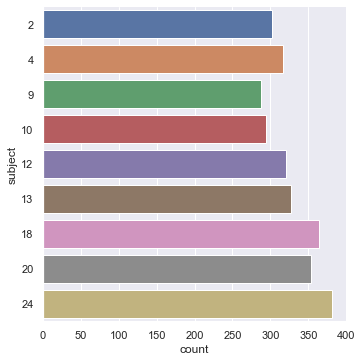

In [5]:
print("Number of subjects in test: ", len(df_test["subject"].unique()))
print(df_test["subject"].value_counts())
sb.catplot(y = "subject", data = df_test, kind = "count")

In [6]:
X_train = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y_train = df_train.Activity
X_test = pd.DataFrame(df_test.drop(['Activity','subject'], axis = 1))
y_test = df_test.Activity

In [7]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Running lgbm with hypertuning

In [11]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [9]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }   # how to choosse????????
lgbm = lgb.LGBMClassifier()
grid = RandomizedSearchCV(lgbm,param_grid ,refit=True,verbose=2)
grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0, total=   7.7s
[CV] reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0, total=   7.9s
[CV] reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[CV]  reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0, total=   8.8s
[CV] reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=0 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: 

[CV]  reg_alpha=0.5, num_leaves=127, min_data_in_leaf=30, lambda_l2=0, lambda_l1=0, total=  50.0s
[CV] reg_alpha=0.5, num_leaves=127, min_data_in_leaf=30, lambda_l2=0, lambda_l1=0 
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[CV]  reg_alpha=0.5, num_leaves=127, min_data_in_leaf=30, lambda_l2=0, lambda_l1=0, total=  52.9s
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=400, lambda_l2=1, lambda_l1=1 
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda

[CV]  reg_alpha=0.5, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=1.5, total=   7.1s
[CV] reg_alpha=0.5, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=1.5 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[CV]  reg_alpha=0.5, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=1.5, total=   6.5s
[CV] reg_alpha=0.5, num_leaves=127, min_data_in_leaf=100, lambda_l2=1, lambda_l1=1.5 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.2min finished


In [10]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)

Model accuracy score with default hyperparameters: 0.9498

 The best estimator across ALL searched params:
 LGBMClassifier(lambda_l1=0, lambda_l2=0, min_data_in_leaf=400, num_leaves=127,
               reg_alpha=0.1)


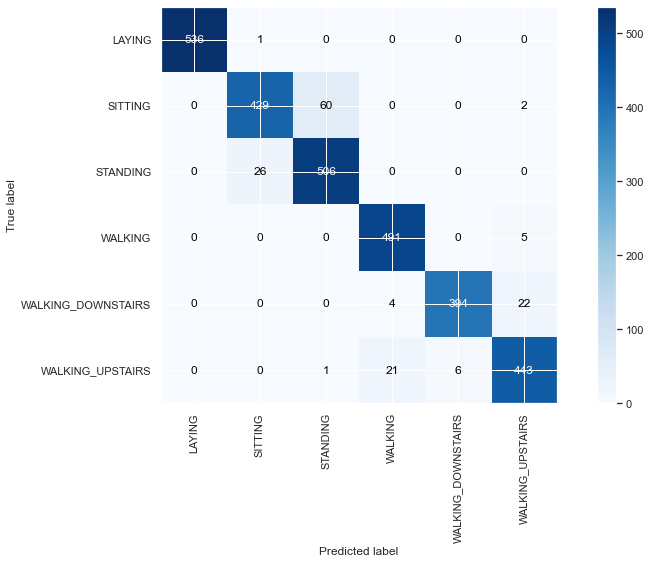

In [11]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

## Using best parameters to find important features

In [12]:
lgbm_optimized = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_optimized.fit(X_train_scaled, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)

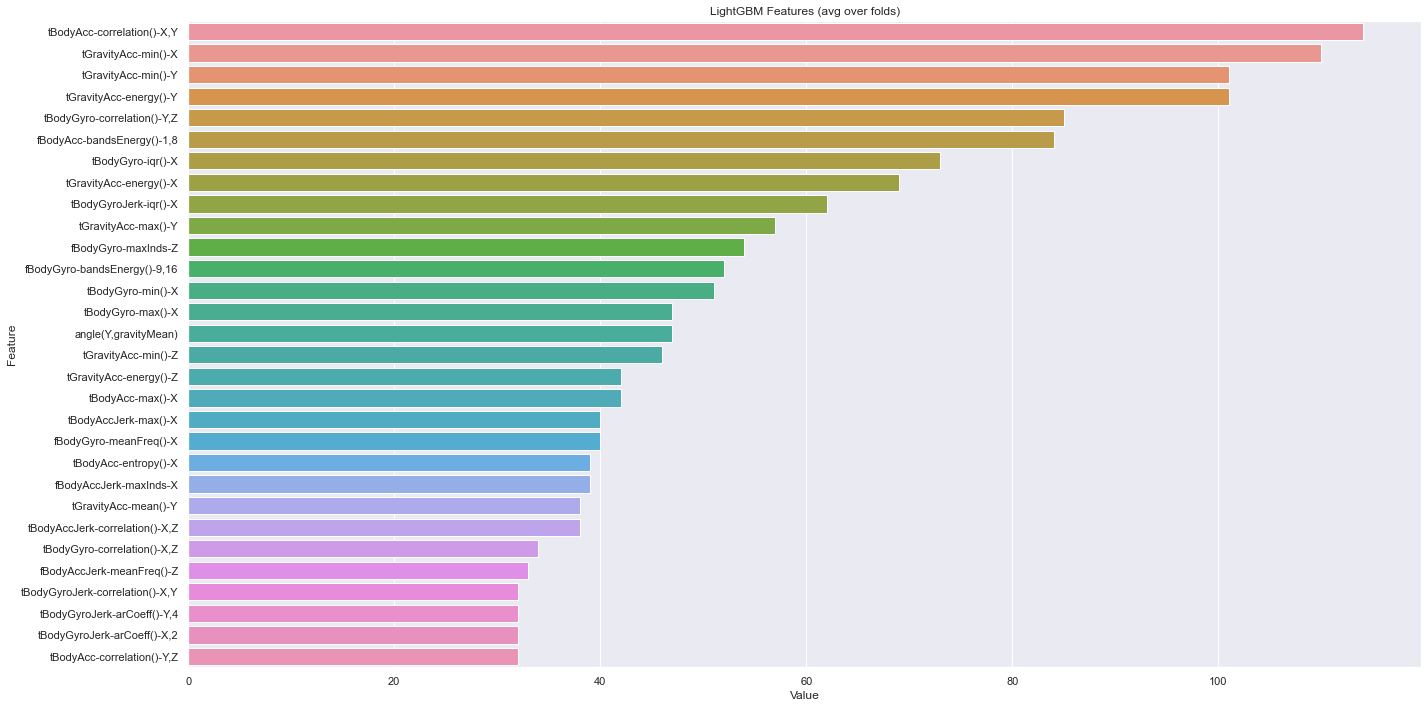

In [13]:
#refer https://www.kaggle.com/code/ashishpatel26/feature-importance-of-lightgbm/notebook#Feature-importance

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm_optimized.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
#feature_importances = (feature_imp / sum(feature_imp)) * 100
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(30))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Drop top 30 important features and retrain the model

In [22]:
top30_features = feature_imp.sort_values(by="Value", ascending=False).head(30).Feature
X_train_afterDrop = X_train.drop(top30_features,axis=1)
X_test_afterDrop = X_test.drop(top30_features,axis=1)
X_train_afterDrop_scaled=scaler.fit_transform(X_train_afterDrop)
X_test_afterDrop_scaled=scaler.fit_transform(X_test_afterDrop)

In [24]:
lgbm_30 = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_30.fit(X_train_afterDrop_scaled, y_train)
y_pred_30 = lgbm_30.predict(X_test_afterDrop_scaled)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_30)))

Model accuracy score with default hyperparameters: 0.9549


### After dropping 30 important features, the accuracy did not drop

## Drop first 10% important features and retrain the model

In [26]:
top10p_features = feature_imp.sort_values(by="Value", ascending=False).head(56).Feature
X_train_afterDrop10p = X_train.drop(top10p_features,axis=1)
X_test_afterDrop10p = X_test.drop(top10p_features,axis=1)
X_train_afterDrop10p_scaled=scaler.fit_transform(X_train_afterDrop10p)
X_test_afterDrop10p_scaled=scaler.fit_transform(X_test_afterDrop10p)

In [28]:
lgbm_10p = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_10p.fit(X_train_afterDrop10p_scaled, y_train)
y_pred_10p = lgbm_10p.predict(X_test_afterDrop10p_scaled)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_10p)))

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9437


## Drop first 30% important features and retrain the model

In [29]:
top30p_features = feature_imp.sort_values(by="Value", ascending=False).head(170).Feature
X_train_afterDrop30p = X_train.drop(top30p_features,axis=1)
X_test_afterDrop30p = X_test.drop(top30p_features,axis=1)
X_train_afterDrop30p_scaled=scaler.fit_transform(X_train_afterDrop30p)
X_test_afterDrop30p_scaled=scaler.fit_transform(X_test_afterDrop30p)
lgbm_30p = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_30p.fit(X_train_afterDrop30p_scaled, y_train)
y_pred_30p = lgbm_30p.predict(X_test_afterDrop30p_scaled)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_30p)))

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.7764


## Drop first 50% important features and retrain the model

In [30]:
top50p_features = feature_imp.sort_values(by="Value", ascending=False).head(230).Feature
X_train_afterDrop50p = X_train.drop(top50p_features,axis=1)
X_test_afterDrop50p = X_test.drop(top50p_features,axis=1)
X_train_afterDrop50p_scaled=scaler.fit_transform(X_train_afterDrop50p)
X_test_afterDrop50p_scaled=scaler.fit_transform(X_test_afterDrop50p)
lgbm_50p = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_50p.fit(X_train_afterDrop50p_scaled, y_train)
y_pred_50p = lgbm_50p.predict(X_test_afterDrop50p_scaled)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_50p)))

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.7424


## after dropping first 50% important features the model still has relative high accuracy. 
## We try to group similar features in group and drop the group one by one

In [40]:
main_feature_list = ['fBodyAcc','fBodyGyro','fBodyAccJerk','tGravityAcc','tBodyAcc','tBodyGyroJerk','tBodyGyro','tBodyAccJerk',
                     'tBodyAccMag','tGravityAccMag','tBodyAccJerkMag','tBodyGyroMag','tBodyGyroJerkMag','fBodyAccMag',
                     'fBodyBodyAccJerkMag','fBodyBodyGyroMag','fBodyBodyGyroJerkMag','angle']
for feature in main_feature_list:
    print("drop " + feature + ":\n")
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    print("X_train shape: ", len(X_train_drop_main_feature))
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    X_train_drop_main_feature_scaled = scaler.fit_transform(X_train_drop_main_feature)
    X_test_drop_main_feature_scaled = scaler.fit_transform(X_test_drop_main_feature)
    lgbm_drop_main = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
    lgbm_drop_main.fit(X_train_drop_main_feature_scaled, y_train)
    y_pred_drop_main = lgbm_drop_main.predict(X_test_drop_main_feature_scaled)
    print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

drop fBodyAcc:

X_train shape:  7352
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9427
drop fBodyGyro:

X_train shape:  7352
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9352
drop fBodyAccJerk:

X_train shape:  7352
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40

KeyboardInterrupt: 

## The accuracy is still very high

## Combine some classes together?

In [41]:
main_feature_list = ['BodyAcc','BodyGyro','GravityAcc','angle']  # ignore jerk, put jerk data into nonjerk data tgt
for feature in main_feature_list:
    print("drop " + feature + ":\n")
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    X_train_drop_main_feature_scaled = scaler.fit_transform(X_train_drop_main_feature)
    X_test_drop_main_feature_scaled = scaler.fit_transform(X_test_drop_main_feature)
    lgbm_drop_main = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
    lgbm_drop_main.fit(X_train_drop_main_feature_scaled, y_train)
    y_pred_drop_main = lgbm_drop_main.predict(X_test_drop_main_feature_scaled)
    print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

drop BodyAcc:

X_train shape:        tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  \
0                 0.963396             -0.140840              0.115375   
1                 0.966561             -0.141551              0.109379   
2                 0.966878             -0.142010              0.101884   
3                 0.967615             -0.143976              0.099850   
4                 0.968224             -0.148750              0.094486   
...                    ...                   ...                   ...   
7347              0.923148             -0.222004             -0.039492   
7348              0.918343             -0.242053             -0.039863   
7349              0.919810             -0.236950             -0.026805   
7350              0.922323             -0.233230             -0.004984   
7351              0.918707             -0.233292             -0.020954   

      tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravityAcc-std()-Z  \
0        

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9131
drop GravityAcc:

X_train shape:        tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   


[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9403


## The accuracy is still higher than 0.9

## how about hide one sensor?

In [43]:
main_feature_list = ['Acc','Gyro']
for feature in main_feature_list:
    print("drop " + feature + ":\n")
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    print(X_train_drop_main_feature)
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    X_train_drop_main_feature_scaled = scaler.fit_transform(X_train_drop_main_feature)
    X_test_drop_main_feature_scaled = scaler.fit_transform(X_test_drop_main_feature)
    lgbm_drop_main = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
    lgbm_drop_main.fit(X_train_drop_main_feature_scaled, y_train)
    y_pred_drop_main = lgbm_drop_main.predict(X_test_drop_main_feature_scaled)
    print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

drop Acc:

      tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  \
0              -0.006101           -0.031365            0.107725   
1              -0.016112           -0.083894            0.100584   
2              -0.031698           -0.102335            0.096127   
3              -0.043410           -0.091386            0.085538   
4              -0.033960           -0.074708            0.077392   
...                  ...                 ...                 ...   
7347           -0.035024           -0.093011            0.124412   
7348            0.118696           -0.095746            0.033277   
7349           -0.213192            0.039321            0.197982   
7350           -0.406205            0.068797            0.177467   
7351           -0.041810           -0.322506            0.038252   

      tBodyGyro-std()-X  tBodyGyro-std()-Y  tBodyGyro-std()-Z  \
0             -0.985310          -0.976623          -0.992205   
1             -0.983120          -0.989046

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Model accuracy score with default hyperparameters: 0.9131
